In [20]:
import os
import tensorflow as tf
from tensorflow.core.util import event_pb2
import glob
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

figsize=(15,12)
fontsize = 45
export_dir = './plots_bar/'
load_dir = './data_tournament/'
filetype = 'pdf'

env_name = 'stag_hunt'
row_name = ['S', 'M', 'L', 'O']
col_name = ['SP5', 'PP3', 'PP5']

row_name_dict = {'S': 'Small',
                 'M': 'Medium',
                 'L': 'Large',
                 'O': 'Obstacle'}

col_name_dict = {'SP5': 'SP',
                 'PP3': 'PP3',
                 'PP5': 'PP5',
                 'FCP3': 'FCP 3 Seeds',
                 'FCP5': 'FCP 5 Seeds'}

sns.set()
sns.set_context("paper")
sns.set(rc={'figure.figsize':figsize})
sns.set_style("whitegrid")
palette = ["#FFBE7A", "#FA7F6F", "#82B0D2", "#BEB8DC"]

In [21]:
rewards = np.empty((len(row_name), len(col_name), 2)) # mean & variance
raw_df = pd.DataFrame()
for row in np.arange(len(row_name)):
    for col in np.arange(len(col_name)):
        loaded = np.load(os.path.join(load_dir,env_name+'_'+row_name[row]+'_'+col_name[col]+'.npz'))
        # print(np.shape(loaded['rewards']))
        current_reward = np.mean(loaded['rewards'], axis=1).flatten()
        temp_df = pd.DataFrame({'rewards': current_reward, 
                                'config': np.repeat(row_name_dict[row_name[row]], len(current_reward)),
                                'method': np.repeat(col_name_dict[col_name[col]], len(current_reward))})
        raw_df = raw_df._append(temp_df, ignore_index=True)
raw_df

,rewards,config,method
0,59.982901,Small,SP
1,60.783304,Small,SP
2,51.308523,Small,SP
3,56.833208,Small,SP
4,63.529546,Small,SP
...,...,...,...
715,54.610093,Obstacle,PP5
716,47.114800,Obstacle,PP5
717,51.559246,Obstacle,PP5
718,49.415450,Obstacle,PP5


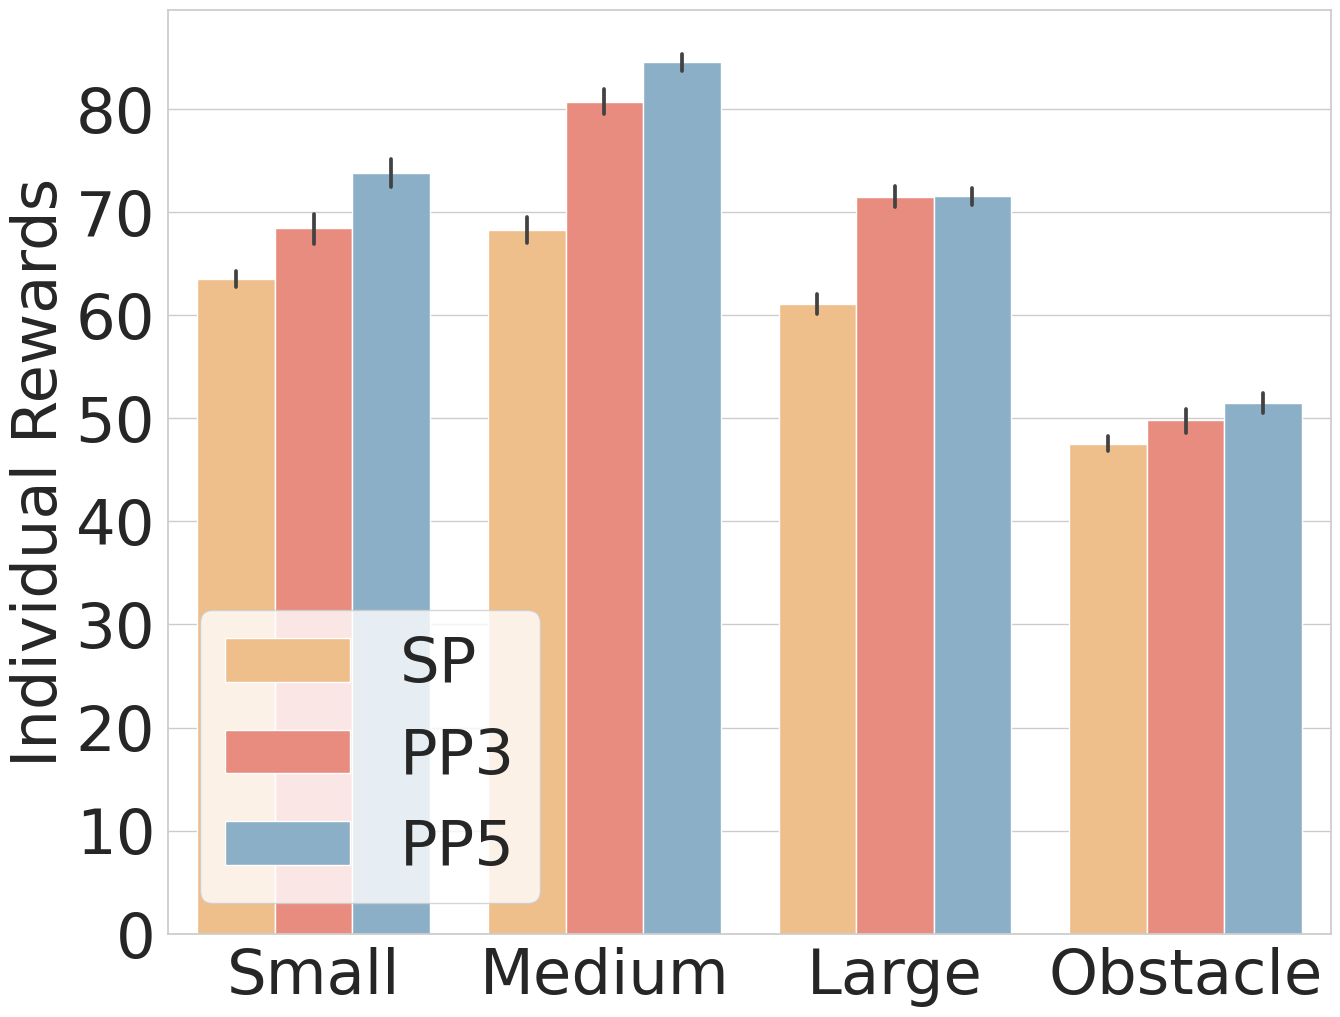

In [22]:
ax = sns.barplot(data=raw_df, x='config', y='rewards', hue='method', palette=sns.color_palette(palette,3))

ax.set_xlabel('', fontsize=fontsize)
ax.set_ylabel('Individual Rewards', fontsize=fontsize)
# ax.set_title((env_name.replace('_',' ')+' Tournament').title(), fontsize=fontsize, y=1.05)
ax.legend(fontsize=fontsize, loc='lower left')

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.savefig(os.path.join(export_dir, env_name.replace('_',' ')+' bar.'+filetype), bbox_inches='tight')